# Medical Examination Data Analysis

This notebook performs an analysis on a medical examination dataset, focusing on health metrics such as cholesterol, glucose levels, and overweight status. It includes data cleaning, transformation, and visualization.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight or Body Mass Index (BMI) ' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)

# Normalize data
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)


## Draw Categorical Plot

This section will create a categorical plot to visualize the counts of health metrics.


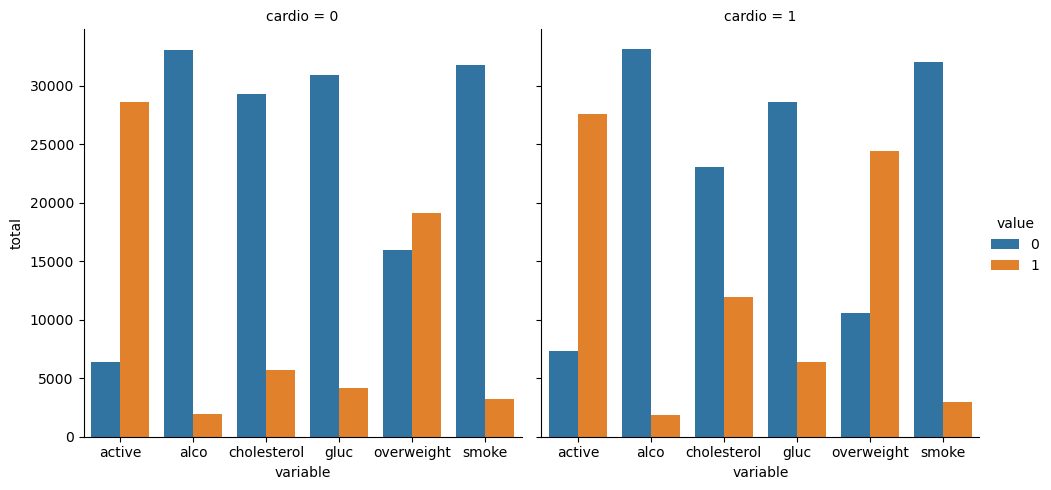

In [21]:
def draw_cat_plot():
    # Create DataFrame for cat plot
    df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    

    # Draw the catplot
    graph = sns.catplot(data=df_cat, kind='bar', x='variable', y='total', hue='value', col='cardio')
    fig = graph.fig

    # Save the figure
    fig.savefig('catplot.png')
    plt.show()  # Optional: display the plot

# Call the function to draw the categorical plot
draw_cat_plot()

## Draw Heat Map

This section will create a heat map to visualize the correlations between health metrics.


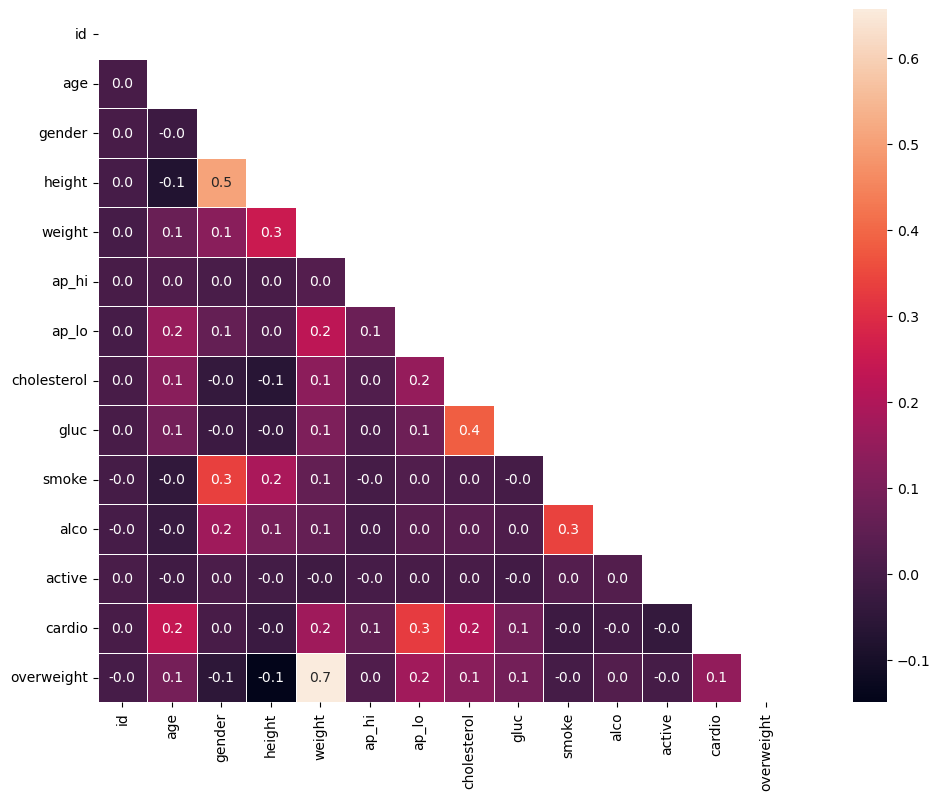

In [29]:
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(16, 9))

    # Draw the heatmap
    sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

    # Save the figure
    fig.savefig('heatmap.png')
    

# Call the function to draw the heat map
draw_heat_map()
